# Pokémon Visualisation

**Over here we will be looking at the Pokémons distributed over the 7 generations and have fun creating some visualisation and trying to draw insights from them.**

**We will be using tools like Pandas, seaborn and missingno for doing simple analytics as counting, filtering, cleaning the data and some basic plotting techniques.**

<span style="color:gray"> **Note: The dataset is available on [Kaggle](https://www.kaggle.com/rounakbanik/pokemon) and can be downloaded from there** </span>

**Table of Contents:**
1. [**Missing Values**](#missingValues)
    1. [_Checking wether missing values are present in the data_](#missingValues1)
    2. [_Visualising missing values_](#missingValues2)
    3. [_Impute missing values_](#missingValues3)
2. [**Analysing Datatypes**](#analysingDatatypes)
    1. [_Different datatypes present in the dataframe_](#analysingDatatypes1)
    2. [_Visualising the datatypes_](#analysingDatatypes2)
3. [**Memory Consumption**](#memoryConsumption)
    1. [_Optimising the integer columns_](#memoryConsumption1)
    2. [_Optimising the float columns_](#memoryConsumption2)
4. [**Data Exploraton**](#dataExploration)
    1. [_type1 and type2_](#type)
    2. [_classification_](#classification)
    3. [_percentage_male_](#percentageMale)
    4. [_capture_rate_](#captureRate)
    5. [_abilities_](#abilities)
    6. [_pokedex_number_](#pokedexNumber)
    7. [_height_m and weight_kg_](#heightAndWeight)
    8. [_base_egg_steps_](#baseEggSteps)
    9. [_experience_growth_](#experienceGrowth)
5. [**Data Exploration - Pokémon Stats**](#dataExplorationStats)
    1. [_Overview of all stats_](#overview)
    2. [_base_happiness_](#baseHappiness)
    3. [_hp_](#hp)
    4. [_attack and defense__](#attackAndDefense)
    5. [_sp_attack and sp_defense_](#spAttackAndSpDefense)
    6. [_against__](#against)
    7. [_speed_](#speed)
    8. [_generation_](#generation)
    9. [_is_legendary_](#isLegendary)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

<span style="color:gray">**In case of real world problems, it is very common that we may face data with a lot of missing values. These missing values or `Nan` can create probelms while building visualisation and models for analysis. Thats why we use imputation techiques to handle these missing values. But before doing that we need to have a good understanding of how the NaN values are distributed in our dataset.**</span>

<span style="color:gray">**_Missingno_ library offers some really great tools to nicely visualise the distribution of NaN values. _Missingno_ is a Python library and compatible with Pandas**</span>

Now we can load the dataset, let's name the dataframe **pokedata** and take a look at the first and the last 5 rows of the dataset to get ageneral idea of the data.

In [2]:
pokedata = pd.read_csv('/home/mihir/Desktop/Test/DataSet/Pokemon/pokemon.csv')
print(pokedata.shape)
pokedata.head()

(801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


**We can see that we have:**
1. _801_ Pokémon,
2. 41 features to describe each Pokémon.

In [3]:
pokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

A quick observation over here will be the data is **not purely numeric** and **there are null values** in the data base.


<a id='missingValues'> 
## Missing Values 
</a>

**In this section we will see:**
1. Check wether missing values are present in the data (using code),
2. Visualising missing values,
3. Impute missing values.

<a id='missingValues1'> 
### 1. Checking wether missing values are present in the data
</a>

In [4]:
pokedata.isnull().values.any()

True

We can see that **missing values are present** in the dataframe.

What we can do is, we can try to **list all the columns that have the null values**.

In [5]:
cols_with_missing_val = pokedata.columns[pokedata.isnull().any()].tolist()
print('Number of columns with missing values: {}'.format(len(cols_with_missing_val)))
print('Columns with missing values are:')
for i, col in enumerate(cols_with_missing_val):
    print(str(i+1)+'.', col)

Number of columns with missing values: 4
Columns with missing values are:
1. height_m
2. percentage_male
3. type2
4. weight_kg


There are **4** columns with missing values.

Let's get the **exact count** of missing values in each column.

In [6]:
pokedata.isnull().sum(axis = 0)[pokedata.isnull().sum(axis = 0) > 0]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

<a id='missingValues2'> 
### 2. Visualising missing values
</a>
    
Over here we will be using `missingno` which offers a very nice way to present the missing values.

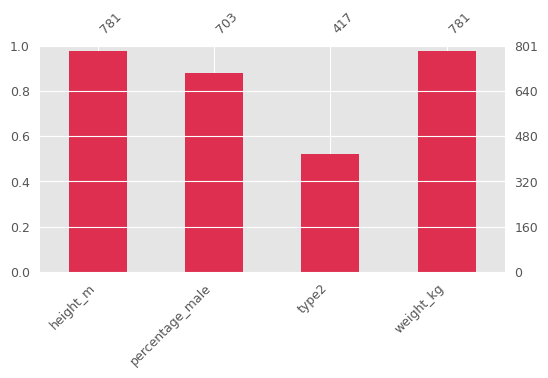

In [7]:
msno.bar(pokedata[cols_with_missing_val], figsize = (6,3), color = "#de2f51", fontsize = 9, labels = True)

Over here we have a **histogram** where all the **non missing values** are stacked seperately according to their count.

**Observations:**
1. **type2** column almost has half of the values missing.
2. **height_m** and **weight_kg** have equal amount of missing values.

**What we can do?**
1. We can see if the missing values in **weight_kg** and **height_m** are **missing for the same Pokémon or different**.
2. How are the missing values **distributed through the dataset**.

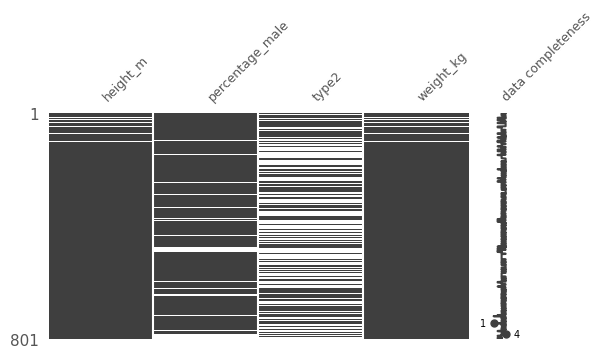

In [8]:
msno.matrix(pokedata[cols_with_missing_val], labels = True, fontsize = 9, figsize = (6, 3))

**Observations:**
1. Majority of the **height_m** and **weight_kg's** missing data is from the earlier generation.
2. **type2's** missing values are distributed throughout the 801 Pokémon.
3. **percentage_male** has not as many missing values but is also distributed through the 801 Pokémon.

**What can we do?**
1. The **height_m** and **weight_kg's** missing data is from the earlier generation and that is suspicious as the earlier the generation, more the data we should have about the Pokémon.

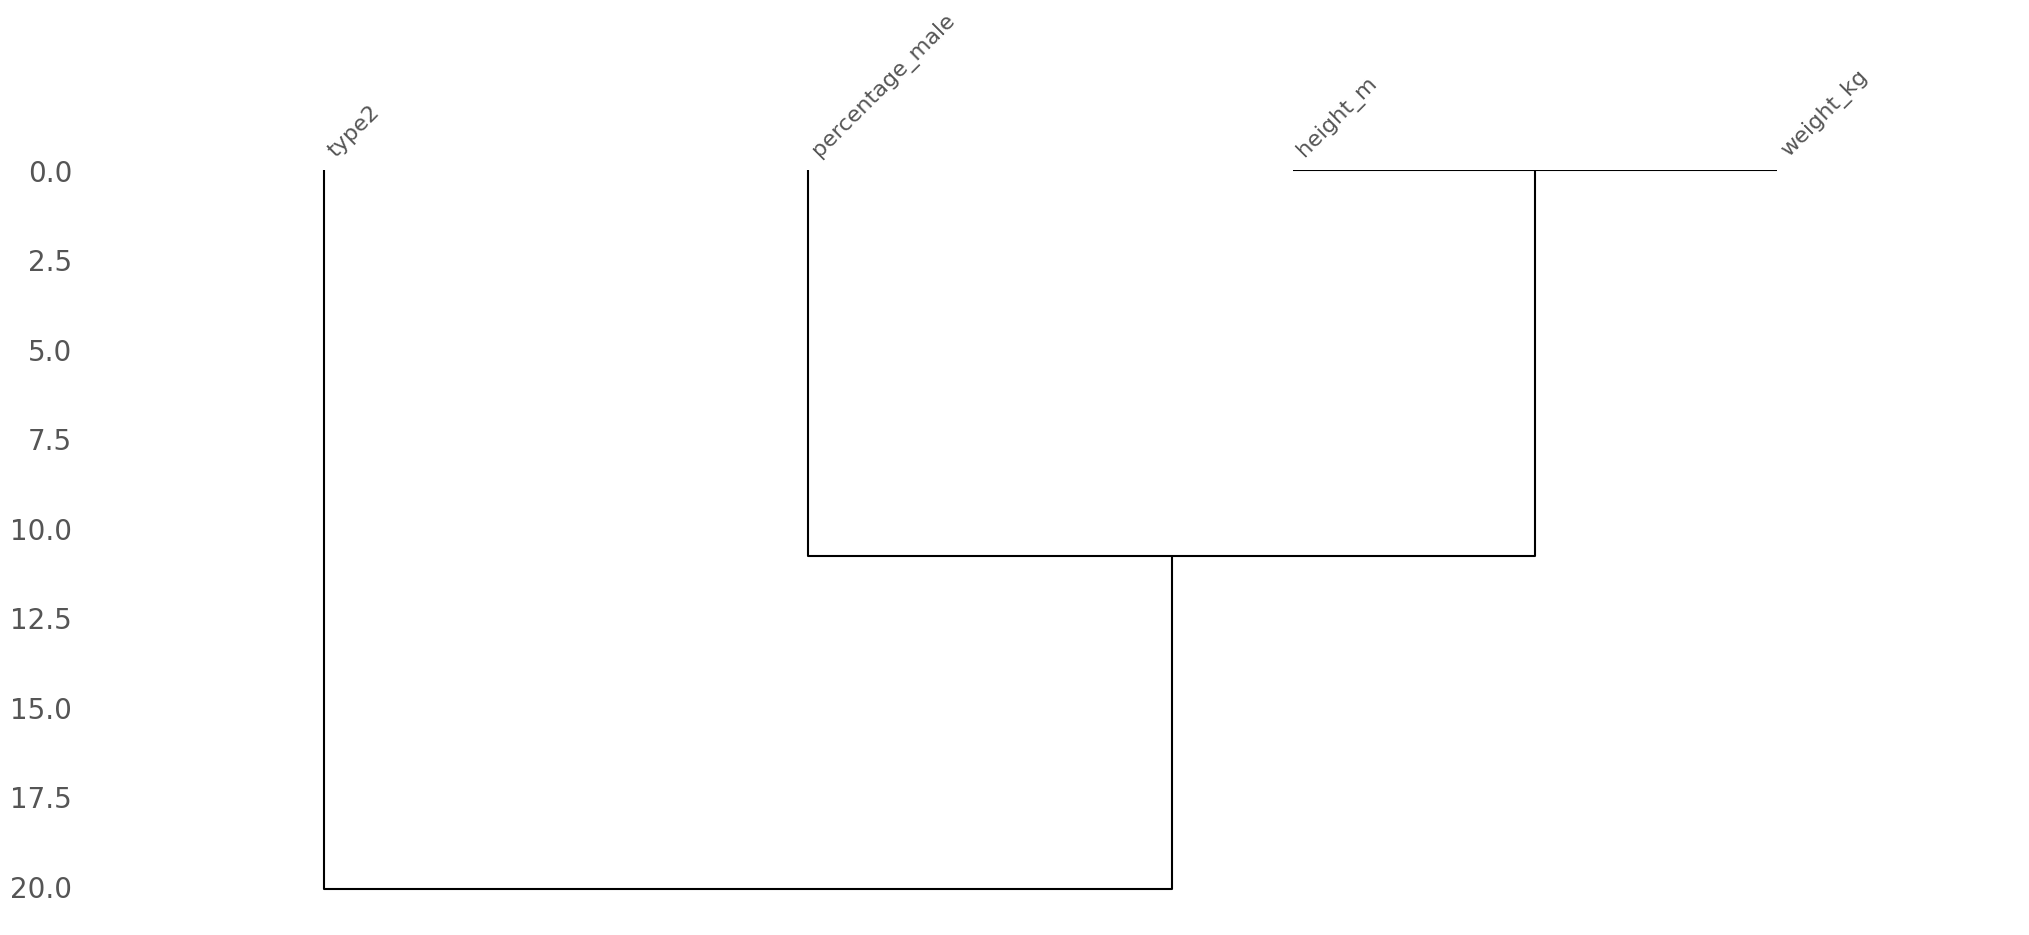

In [9]:
msno.dendrogram(pokedata[cols_with_missing_val])

**Observation:**
1. **type2** is the least related of the four columns.

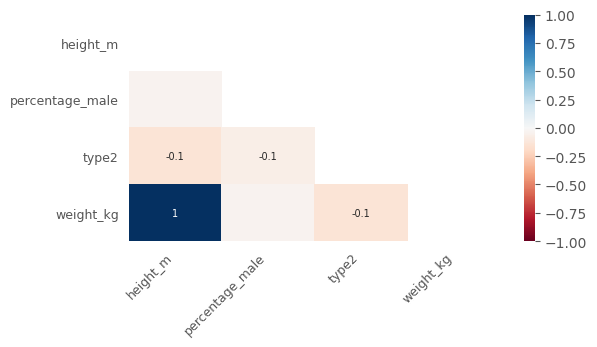

In [10]:
msno.heatmap(pokedata[cols_with_missing_val], labels = True, fontsize = 9, figsize=(6,3))

**Observation:**
1. Over here we can see that among the missing, **height_m** and **weight_kg** have the highest correlation. This means that wherever **height_m** is missing a value, **weight_kg** is also missing a value for the same Pokémon.

**What can be done?**
1. We can see if the Pokémon that are missing values are **actually weightless** or are they **unmeasurable**.

<a id='missingValues3'> 
### 3. Impute missing values
</a>

Inorder to impute the missing values we need to **see what the non-missing values look like**.

The following code snippet shows the **number of unique values** in each of the columns with missing values.

In [11]:
pokedata[cols_with_missing_val].nunique()

height_m            51
percentage_male      7
type2               18
weight_kg          421
dtype: int64

**1. percentage_male**

**percentage_male** is the percentage of a particular Pokémon population that are male. So we can say that a **missing value** over here will determine that, that particular Pokémon is **gender neutral**. What we can do is we can assign the gender neutral Pokémon as **"-1"**.

In [12]:
pokedata.percentage_male.unique()

array([ 88.1,  50. ,   0. , 100. ,  24.6,  75.4,   nan,  11.2])

As we can see there are **7 unique** values and the **NaN** value needs to be replaced by **"-1"**.

In [13]:
pokedata.percentage_male.fillna(np.int(-1), inplace=True)
pokedata.percentage_male

0      88.1
1      88.1
2      88.1
3      88.1
4      88.1
       ... 
796    -1.0
797    -1.0
798    -1.0
799    -1.0
800    -1.0
Name: percentage_male, Length: 801, dtype: float64

As we can see the **Nan** values have been replaced by **"-1.0"**.

**2. type2** 

Let's take a look at various string elements present in **type2**.

In [14]:
print(pokedata.type2.nunique())
print(pokedata.type2.unique())

18
['poison' nan 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


We will assign the **Nan** value with a string not there in the list. We will be replacing **Nan** with **TEMP**.

In [15]:
pokedata.type2.fillna('TEMP', inplace = True)
pokedata.type2

0      poison
1      poison
2      poison
3        TEMP
4        TEMP
        ...  
796    flying
797     steel
798    dragon
799      TEMP
800     fairy
Name: type2, Length: 801, dtype: object

**3. height_m and weight_kg**

We will list out all the Pokémon with no **height_m** and **weight_kg**.

In [16]:
pokedata[pokedata.weight_kg.isnull()].name

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

The above Pokémon have no **height_m** and **weight** and they are majority from the first generation which actually is weird.

On seeing the names of the Pokémon and applying the knowledge we have for them, Pokémon like _Grimer, Muk, Diglet and Dugtrio_ it would be **difficult to estimate** their height and weight. But for other Pokémon it just simply **doesn't make sense for them to have no height or weight.**

Ignoring the above observation, we will be replacing the **NaN** values with **0** as we have to deal with the data in hand and draw analysis.

In [17]:
pokedata.height_m.fillna(np.int(0), inplace=True)
pokedata.weight_kg.fillna(np.int(0), inplace=True)

**Checking** if replacing the values was succesful or not.

In [18]:
pokedata.isnull().values.any()

False

<a id='analysingDatatypes'> 
## Analysing Datatypes
</a>

**In this section we will see:**
1. Different datatypes present in the dataframe
2. Visualising the dataypes

<a id='analysingDatatypes1'> 
### 1. Different datatypes present in the dataframe
</a>

We will see what **different datatypes** are present in the `pokedata` dataframe.

In [19]:
print('Number of unique datatypes:', pokedata.dtypes.nunique())
print('List of unique datatypes:\n', pokedata.dtypes.unique())

Number of unique datatypes: 3
List of unique datatypes:
 [dtype('O') dtype('float64') dtype('int64')]


**Observation:**
1. There are **three** different datatypes present in the dataframe:
    1. Object
    2. Float 64-bit
    3. Int 64-bit

<a id='analysingDatatypes2'> 
### 2. Visualising the datatypes
</a>

The reason we have to analyse the datatypes is for **memory consumption**. 

<span style='color:gray'>**Note: For this project it isn't necessary, but when we get into real world problems memory utilisation plays a big role in a particular project's success.**</span>

We will see how the different datatypes mentioned above are **distributed** and **their counts**.

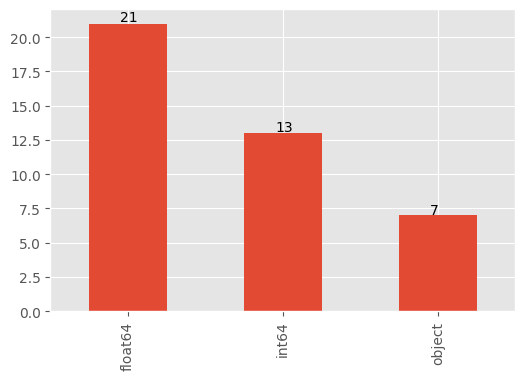

In [20]:
ax = pd.value_counts(pokedata.dtypes).plot.bar()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2.5, p.get_height() * 1.01))

In [21]:
import sys
print(
    'Size of a float64 v/s float16:', 
    np.dtype(np.float64).itemsize, 
    'v/s', 
    np.dtype(np.float16).itemsize
)
print(
    'Size of an int64 v/s int8:', 
    np.dtype(np.int64).itemsize,
    'v/s',
    np.dtype(np.int8).itemsize
)
print('Size of an object:', sys.getsizeof(object))

Size of a float64 v/s float16: 8 v/s 2
Size of an int64 v/s int8: 8 v/s 1
Size of an object: 400


**Observations:**
1. All the datatypes are in **64-bit**,
2. An **object** holds the **highest memory** but is flexible based on what it is storing,
3. There is atleast a **difference of half or more** between the 64-bit datatypes and it's lower counterparts.

**What can be done?**
1. We can **check** every column and see **which datatype fits it the best**,
2. **Assign** that datatype to that column.

<a id='memoryConsumption'> 
## Memory Consumption
</a>

**Memory usage** is an important aspect when dealing with hardware of **limited capacity**.

**In this section we will see:**
1. How to monitor the memory usage using pandas
2. Reduce the memory consumption by reassigning appropriate datatypes.

In [22]:
mem = pokedata.memory_usage(index = True).sum()
print("Memory consumed by the training set:\t{} MB".format(mem / 1024 ** 2))

Memory consumed by the training set:	0.25067901611328125 MB


By **altering the datatypes** we can **reduce** the memory usage.

First we will start dealing with the `int` _(integer)_ datatype.

<a id='memoryConsumption1'> 
### 1. Optimising the integer columns
</a>

In [23]:
def change_datatypes(df):
    int_cols = list(df.select_dtypes(include = ['int']).columns)
    for col in int_cols:
        if ((np.max(df[col]) < 127) and (np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767 ) and (np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) < 2147483647) and (np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)
            
change_datatypes(pokedata)

In [24]:
mem = pokedata.memory_usage(index=True).sum()
print("Memory consumed by the training set:\t{} MB".format(mem / 1024 ** 2))

Memory consumed by the training set:	0.19109535217285156 MB


We can see there is about **0.06 MB** of reduction in the memory usage to the dataframe.

Now let's optimise the columns with type `float64` to type `float32`.

<a id='memoryConsumption2'> 
### 2. Optimising the float columns
</a>

In [25]:
def change_datatypes_float(df):
    float_cols = list(df.select_dtypes(include = ['float']).columns)
    for col in float_cols:
        df[col] = df[col].astype(np.float32)
        
change_datatypes_float(pokedata)

mem = pokedata.memory_usage(index = True).sum()
print("Memory consumed by the training set:\t{} MB".format(mem / 1024 ** 2))

Memory consumed by the training set:	0.12692832946777344 MB


We can see a further reduction in memory usage. Overall we have reduced the dataframe memory consumption by **~50%** from **0.25 MBs** to **0.12 MBs**.

<a id='dataExploration'> 
## Data Exploration
</a>

Now as we are done with the dataframe optimisation. Let's move on to **data exploration** and build some awesome graphs.

We will start with **exploring the data** present in different columns **based on various types**.

**In this section we will see:**
1. [**type1 and type2**](#type)
2. [**classification**](#classification)
3. [**percentage_male**](#percentageMale)
4. [**capture_rate**](#captureRate)
5. [**abilities**](#abilities)
6. [**pokedex_number**](#pokedexNumber)
7. [**height_m and weight_kg**](#heightAndWeight)
8. [**base_egg_steps**](#baseEggSteps)
9. [**experience_growth**](#experienceGrowth)

In [26]:
object_cols = pokedata.select_dtypes(include=['object']).columns.tolist()
object_cols

['abilities',
 'capture_rate',
 'classfication',
 'japanese_name',
 'name',
 'type1',
 'type2']

<a id='type'> 
### 1. type1 and type2 
</a>

**Types** are properties of Pokémons and their moves.

Every Pokémon is either a **Primary type (_type1_)** or a combination of both **Primary and Secondary (_type1_ and _type2_)**. Some Pokémon do not have a **type2** variable, hence they are left to be with **missing values**. 

In [27]:
print('Number of unique primary types:', pokedata.type1.nunique())
print('List of unique primary type:\n', pokedata.type1.unique())

Number of unique primary types: 18
List of unique primary type:
 ['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']


In [28]:
print('Number of secondary types:', pokedata.type2.nunique())
print('List of secondary type:\n', pokedata.type2.unique())

Number of secondary types: 19
List of secondary type:
 ['poison' 'TEMP' 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


As we remember we had replaced `NaN` with `TEMP` at the beginning of the notebook. We will have to replace it back for the convenience of the analysis or it will show us `TEMP` as one of the **secondary types**.

In [29]:
pokedata.replace('TEMP', np.nan, inplace = True)

In [30]:
print(pokedata.type2.unique())

['poison' nan 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


Now we will see the number of **single type** i.e. only primary type and **dual type** i.e. a combination of both primary and secondary Pokémon in the dataframe.

In [31]:
print("Single type Pokémon: {}\nDual type Pokémon: {}".format(len(pokedata[pokedata.type2.isnull()]), len(pokedata[pokedata.type2.notna()])))

Single type Pokémon: 384
Dual type Pokémon: 417


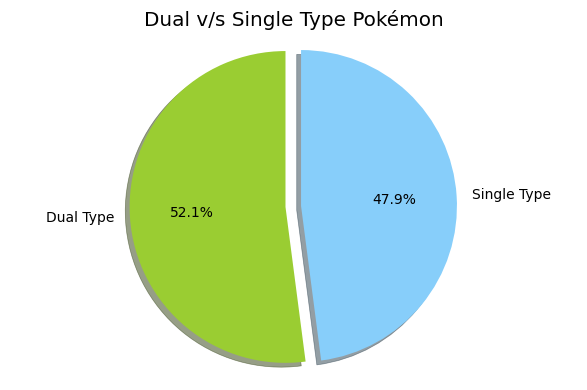

In [32]:
data = [417, 384]
color = ['yellowgreen', 'lightskyblue']

plt.pie(data,
       labels=["Dual Type", "Single Type"],
       shadow=True,
       colors=color,
       explode=(0, 0.1),
       startangle=90,
       autopct="%1.1f%%")

plt.axis('equal')
plt.title("Dual v/s Single Type Pokémon")

plt.tight_layout()
plt.show()

As we can see the distribution of **Single v/s Dual** type of Pokémon is almost half to half, with **Dual type being a slightly higher than Single type**.

Now, we will see what are the **type combinations, Dual type Pokémon make**.

<span style='color:gray'>**Note: We wouldnt be including the Pokémon that doesn't have a _Secondary type_**</span>

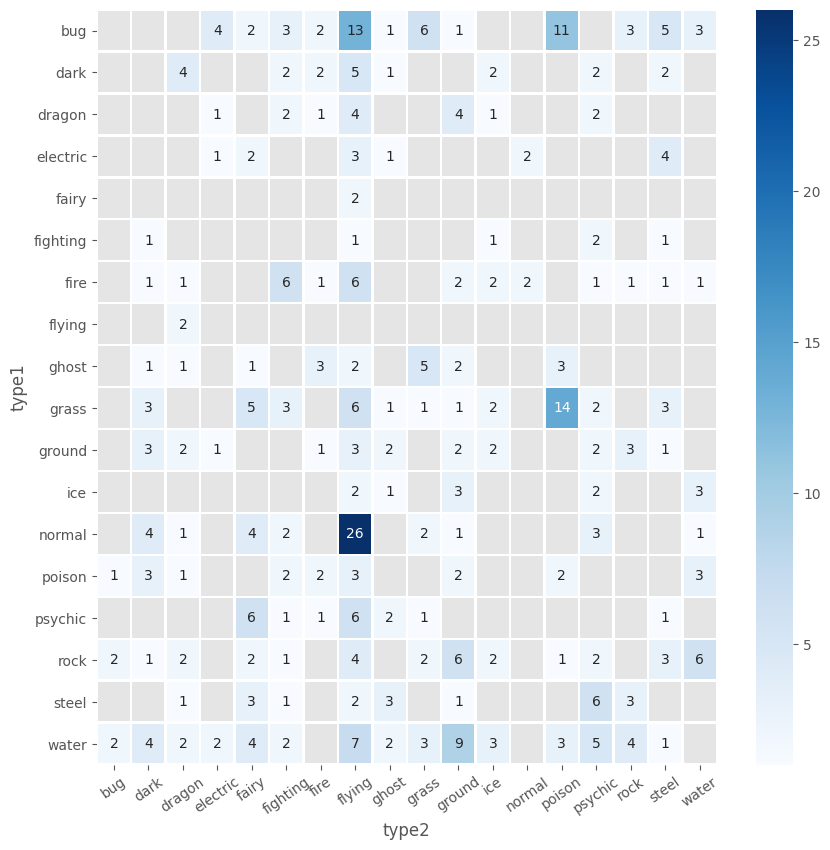

In [33]:
plt.subplots(figsize=(10, 10))

sns.heatmap(
    pokedata[pokedata.type2.notnull()].groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap='Blues'
)

plt.xticks(rotation=35)
plt.show()

**Observations:** 
1. We can see that few Pokémon have the **same Primary and Secondary type**.
2. These **same type combination** includes:
        1. Fire against Fire: 1, 
        2. Electric against Electric: 1,
        3. Grass against Grass: 1, 
        4. Ground against Ground: 2, 
        5. Poison against Poison: 2
    We will be digging deeper into this.
3. **Considerabley high number of combinations** out of the 417 Pokémon are:
    * Normal-Flying: 26
    * Grass-Poison: 14
    * Bug-Flying: 13
    * Bug-Poison: 11
    * Water-Ground: 9
    
**What can be done?**
1. We can see **how valid** those same type combinations are.
2. If **not**, we will try to figure out a way to **tackle that issue**.

In [34]:
same_t1_t2 = pokedata[pokedata.type1 == pokedata.type2]

print('Number of Pokémon with same type in type1 and type2:', len(same_t1_t2))
print(same_t1_t2.name)

Number of Pokémon with same type in type1 and type2: 7
25         Raichu
49        Diglett
50        Dugtrio
87         Grimer
88            Muk
491       Shaymin
554    Darmanitan
Name: name, dtype: object


The count **matches** our manual count based on the graph, i.e. **7**.

We can also see that the Pokémon listed are **actually Single type** Pokémon and were **Falsely marked Dual type**.

In [35]:
pokedata.type2[pokedata.type1 == pokedata.type2] = np.nan
pokedata[pokedata.name == 'Raichu'][['type1', 'type2']]

/home/mihir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type1,type2
25,electric,NaN


Based on our findings we converted the **type2** of this **Falsely marked Dual type** Pokémon to `NaN`.

Now we will again see the distribution of **Single v/s Dual type Pokémon**.

In [36]:
print("Single type Pokémon: {}\nDual type Pokémon: {}".format(len(pokedata[pokedata.type2.isnull()]), len(pokedata[pokedata.type2.notna()])))

Single type Pokémon: 391
Dual type Pokémon: 410


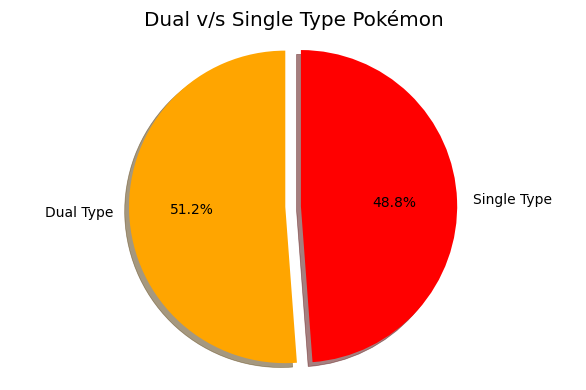

In [37]:
data = [410, 391]
color = ['orange', 'red']

plt.pie(data,
       labels=["Dual Type", "Single Type"],
       shadow=True,
       colors=color,
       explode=(0, 0.1),
       startangle=90,
       autopct="%1.1f%%")

plt.axis('equal')
plt.title("Dual v/s Single Type Pokémon")

plt.tight_layout()
plt.show()

There **wasn't much change** in the distribution of the graph but now we are sure that the **data if inaccurate is a little less inaccurate**.

Now we will see the distribution of **type1** of Pokémon.

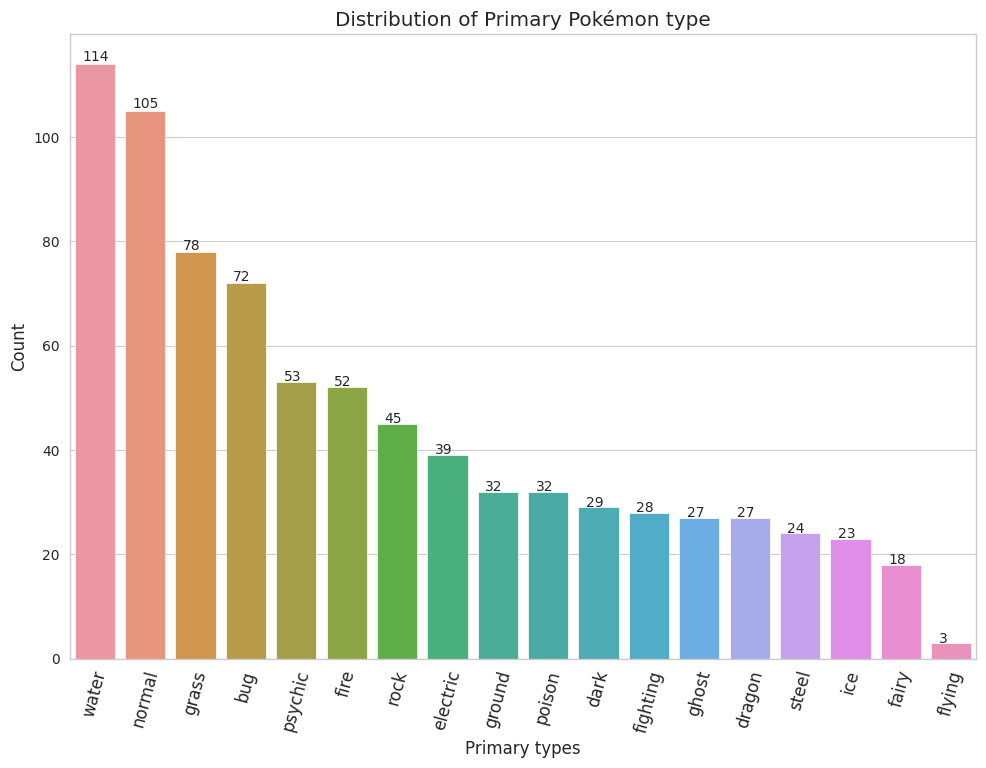

In [38]:
sns.set_style("whitegrid")

pt = pd.value_counts(pokedata['type1'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax = sns.barplot(x = pt.index, y = pt, data = pokedata)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel = 'Primary types', ylabel = 'Count')
ax.set_title('Distribution of Primary Pokémon type')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.15, each.get_height() * 1.005))

**Top 3 most common type1 of Pokémons are:**
1. **Water : 114**
2. **Normal: 105**
3. **Grass : 78**

We will do the same for **type2** of Pokémon

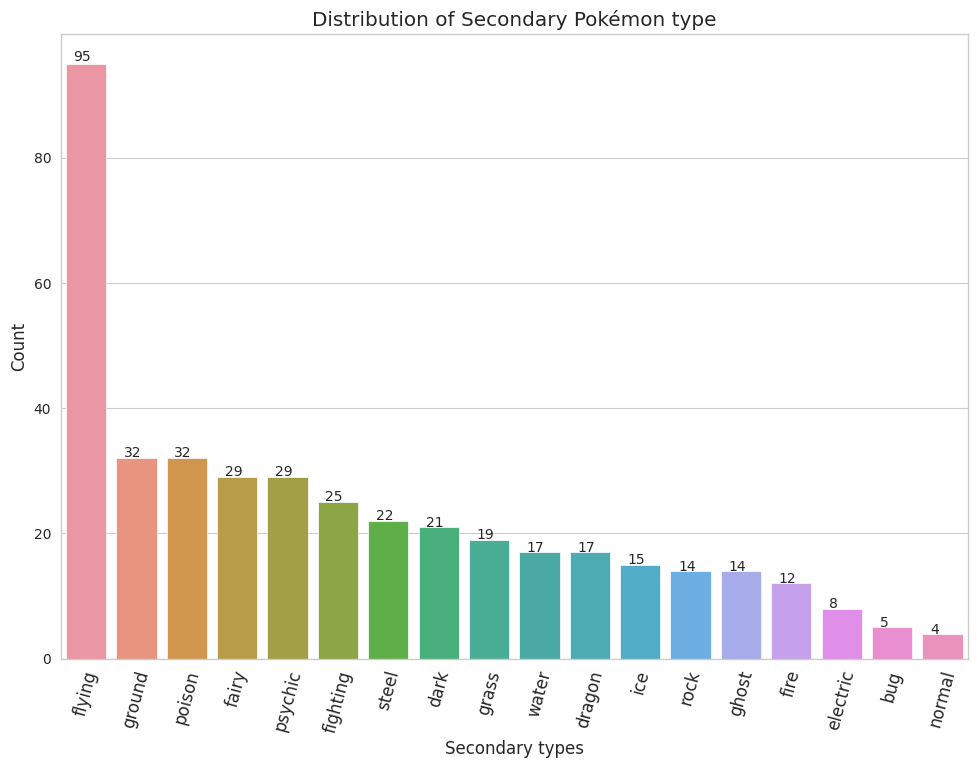

In [39]:
sns.set_style('whitegrid')
pt = pd.value_counts(pokedata['type2'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax = sns.barplot(x = pt.index, y = pt, data = pokedata)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel = 'Secondary types', ylabel = 'Count')
ax.set_title('Distribution of Secondary Pokémon type')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.15, each.get_height() * 1.005))

**Top 3 most common type2 of Pokémons are**
1. **Flying: 95**
2. **Ground: 32**
3. **Poison: 32**


**Observations:**
1. **Primary type** refers to Pokémon's **strong type** and **secondary type** refers to Pokémon's **second strong type**. Based on that we can see that **flying type** is a lot of Pokémon's **secondory type** which gives them the ability to use flying attacks but their primary skills being some different type of attacks
2. We can also see that the lack of **flying type** in **type1** is being compansated in **flying type being the highest in type2**, similarly it goes the same for **normal type** in **type2**.

<a id='classification'> 
### 2. classification
</a>

The classification of Pokémon as described by the **Sun and Moon Pokedex**. Apart from classifying Pokémon base on their **natural or attack type (_eg. water, fire, thunder, etc._)**, they can also be classified by their physical traits which is shown here.

In [40]:
pokedata.classfication.nunique()

588

There are a staggering **588** Pokémon classes. This is a huge number when brought into consideration that there are only **801** Pokémon in our dataset. 

Let's list the number of classes that **occurs the most**.

In [41]:
c = pd.value_counts(pokedata.classfication)

for i in range(0,10):
    print("{}: {}".format(c.index[i], c[i]))

Dragon Pokémon: 8
Mushroom Pokémon: 6
Mouse Pokémon: 6
Balloon Pokémon: 5
Flame Pokémon: 5
Fox Pokémon: 5
Fairy Pokémon: 5
Cocoon Pokémon: 4
Tadpole Pokémon: 4
Bat Pokémon: 4


**Observation:**
1. The **maximum** number of a particular class of Pokémon is **8**.
2. The **maximum** value itself is **very less** so it is going to be **difficult** to bring any analysis to fruitition as there are **too many unique values**.

<a id='percentageMale'> 
### 3. percentage_male
</a>

This feature explains how the **population** of the Pokémon **is distributed between _male_ and _female_**. **Greater** the percentage, **greater is the distribution of male** gender in a particular Pokémon. **-1** means that the Pokémon is **genderneutral**.

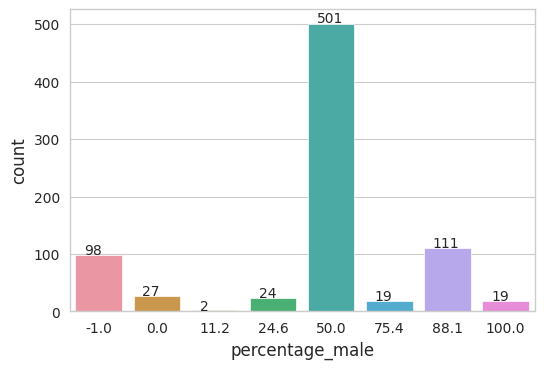

In [42]:
ax = sns.countplot(x = pokedata['percentage_male'], data = pokedata)

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.15, each.get_height() * 1.005))

In [43]:
print('Entirely male Pokémon population: ', len(pokedata[pokedata.percentage_male == 100.00]))
print('Entirely female Pokémon population: ', len(pokedata[pokedata.percentage_male == 0.00]))
print('Gender neutral Pokémon population: ', len(pokedata[pokedata.percentage_male == -1]))
print('Majority male Pokémon population: ', len(pokedata[pokedata.percentage_male > 50.00]))
print('Majority female Pokémon population: ', len(pokedata[(pokedata.percentage_male < 50.00) & (pokedata.percentage_male > 0.00)]))
print('Equal male and female Pokémon population: ', len(pokedata[pokedata.percentage_male == 50.00]))

Entirely male Pokémon population:  19
Entirely female Pokémon population:  27
Gender neutral Pokémon population:  98
Majority male Pokémon population:  149
Majority female Pokémon population:  26
Equal male and female Pokémon population:  501


**Observation:**
1. Most of the Pokémon have a **balanced distribution** between male and female gender. **(501)**
2. **98** Pokémon are **gender neutral**.

**What can we do?**
1. We can see which distribution of gender have the maxinum number of **strong** Pokémon.

<a id='captureRate'> 
### 4. capture_rate
</a>

**Capture rate** describes the **ease** at which it is **to catch** a Pokémon. **Higher** the value, **less difficult** it is to capture a Pokémon.

Let's see all the possible values.

In [44]:
print('Number of unique capture rate:', pokedata.capture_rate.nunique())
print('List of unique capture rates:\n', pokedata.capture_rate.unique())

Number of unique capture rate: 34
List of unique capture rates:
 ['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


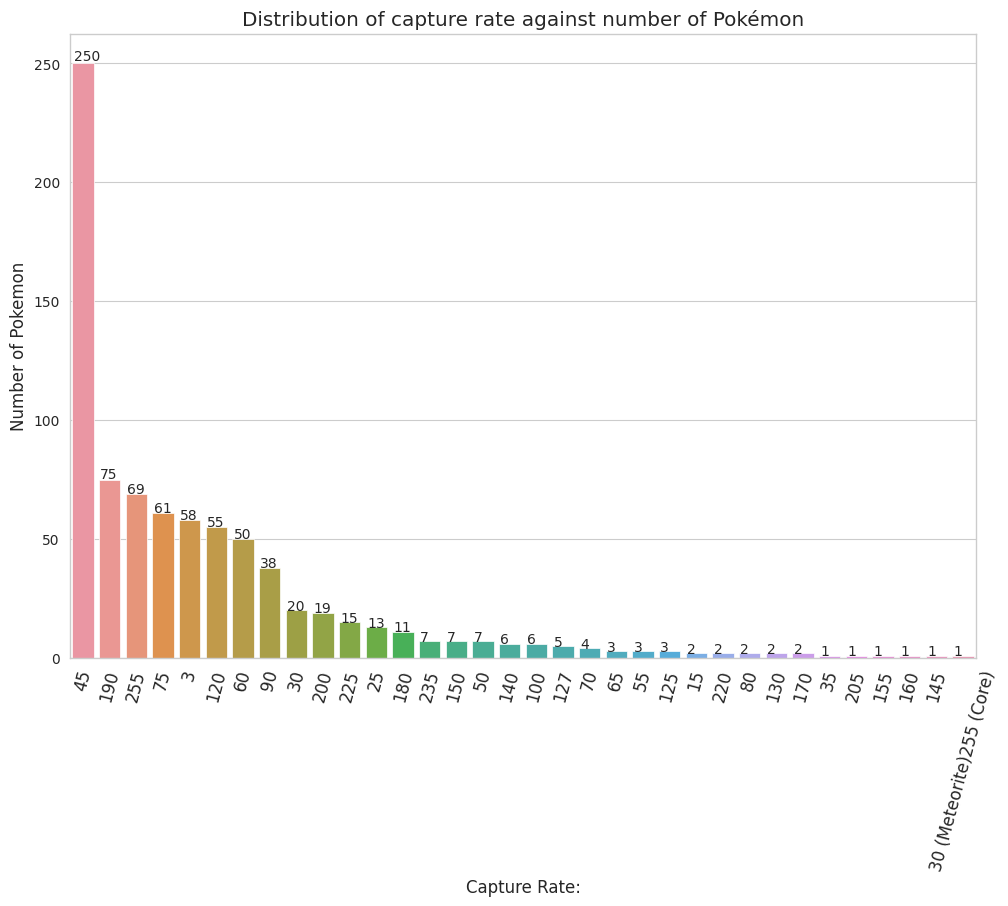

In [45]:
yy = pd.value_counts(pokedata['capture_rate'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style('whitegrid')

ax = sns.barplot(x = yy.index, y = yy, data = pokedata)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel = 'Capture Rate:', ylabel = 'Number of Pokemon')
ax.set_title('Distribution of capture rate against number of Pokémon')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

**Observations:**
1. Majority of the Pokémon are fairly difficult to capture as their **capture_rate** being **45**
2. Considering **255** to be the **easiest to capture** we can see few Pokémons that fall under this category and **3** being the **most difficult to capture** we would also like to see why these Pokémons are so difficult to capture.

Now we will see the first Pokémon that fall under the **easy and difficult to capture** list.

In [46]:
pokedata[pokedata.capture_rate == '255'][['name', 'is_legendary']]

,name,is_legendary
9,Caterpie,0
12,Weedle,0
15,Pidgey,0
18,Rattata,0
20,Spearow,0
...,...,...
730,Pikipek,0
733,Yungoos,0
735,Grubbin,0
794,Pheromosa,1


In [47]:
pokedata[pokedata.capture_rate == '3'][['name', 'is_legendary']]

,name,is_legendary
143,Articuno,1
144,Zapdos,1
145,Moltres,1
149,Mewtwo,1
242,Raikou,1
243,Entei,1
244,Suicune,1
248,Lugia,1
249,Ho-Oh,1
373,Beldum,0


**Observation:**
1. We can see both the easiest and the most difficult have **Legendary** Pokémons.

**What we can do?**
1. We can calculate the correlation between the **capture_rate** and the **is_legendary** feature to determine how many Pokémon are **easy to capture and legendary** and **how many Pokémon are difficult to capture and not legendary**.

There is also a Pokémon with a **variable capture_rate** and I would like to see which Pokémon that is.

In [48]:
pokedata[pokedata.capture_rate == '30 (Meteorite)255 (Core)'][['name', 'generation']]

,name,generation
773,Minior,7


Upon searching online about this generation 7 Pokémon we found out that **Minior** can **temporary change forms**, **meteorite and core** are the **two forms** associated with the Pokémon. We can assume the **core capture_rate as the base capture_rate** of the Pokémon and try to see are majority of the Pokémon easier to capture or difficult.

In [49]:
pokedata.capture_rate.replace('30 (Meteorite)255 (Core)', '255', inplace = True)
pokedata[pokedata.name == 'Minior'].capture_rate

773    255
Name: capture_rate, dtype: object

In [50]:
pokedata.capture_rate = pokedata.capture_rate.astype(np.int32)

In [51]:
easy_to_cap = pokedata[pokedata.capture_rate >= ((255 - 3) / 2 )]
diff_to_cap = pokedata[pokedata.capture_rate < ((255 - 3) / 2)]

print("Easy to capture: {}".format(len(easy_to_cap)))
print("Difficult to capture: {}".format(len(diff_to_cap)))

Easy to capture: 225
Difficult to capture: 576


**Observation:**
1. In the Pokémon world it is **difficult** to capture majority of the Pokémon

**What can we do?**
1. We can see if the **more difficult** a pokemon to capture results into a **stronger** Pokémon and if that is the case are there any Pokémon that are weak also fall in difficult capturerate.
2. We can also divide the set into even more categories like **very easy, easy, difficult, very difficult**.

<a id='abilities'> 
### 5. Abilities
</a>

Each Pokémon can have **one or more** possible attacks.

Lets see the list of possible powers.

In [52]:
pokedata.abilities.nunique()

482

In [53]:
pokedata.abilities.head(20).unique()

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']"],
      dtype=object)

As we can see many Pokémon have **more than one** abilities.

We need to drill down to see which Pokémon have such individual abilities and which of them are more prevalent.

{'Zen Mode', 'Iron Fist', 'Sniper', 'Aura Break', 'Anticipation', 'Pickup', 'Flame Body', 'Rattled', 'Harvest', 'Minus', 'Water Veil', 'Forewarn', 'Normalize', 'Pixilate', 'Slush Rush', 'Magnet Pull', 'No Guard', 'Magic Bounce', 'Dry Skin', 'Wonder Guard', 'Triage', 'Cloud Nine', 'Analytic', 'Healer', 'Blaze', 'Poison Point', 'Drizzle', 'Electric Surge', 'Illuminate', 'Tough Claws', 'Fluffy', 'Adaptability', 'Battle Armor', 'Cute Charm', 'Pickpocket', 'Comatose', 'Anger Point', 'Suction Cups', 'Water Compaction', 'Mega Launcher', 'Poison Heal', 'RKS System', 'Competitive', 'Frisk', 'Cheek Pouch', 'Soundproof', 'Magic Guard', 'Bad Dreams', 'Battery', 'Solid Rock', 'Iron Barbs', 'Sweet Veil', 'Grassy Surge', 'Protean', 'Steelworker', 'Chlorophyll', 'Big Pecks', 'Sticky Hold', 'Quick Feet', 'Bulletproof', 'Drought', 'Speed Boost', 'Friend Guard', 'Infiltrator', 'Justified', 'Overgrow', 'Symbiosis', 'Stamina', 'Fur Coat', 'Serene Grace', 'Skill Link', 'Trace', 'Marvel Scale', 'Victory Star

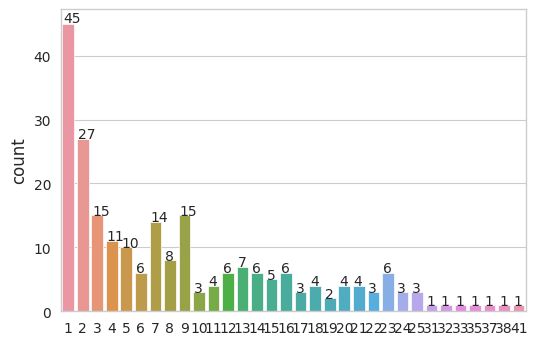

In [54]:
import re

list_ability = pokedata.abilities.tolist()
new_list = list()

for i in range(0, len(list_ability)):
    m = re.findall(r"'(.*?)'", list_ability[i], re.DOTALL)
    for j in range(0, len(m)):
        new_list.append(m[j])
        
list1 = set(new_list)
print(list1)
print(len(list1))

from collections import Counter
count = pd.Series(pokedata.abilities.str.replace('[\[\]\'\s]', '').str.split(',').map(Counter).sum())

print(count.index)
ax = sns.countplot(count)

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

We have **227** unique abilities for all 801 Pokémons!

<a id='pokedexNumber'> 
### 6. pokedex_number
</a>

The entry number of Pokémon in the national Pokédex. Here each Pokémon is assigned a **number unique** to that Pokémon, like an **id**.

In [55]:
pokedata.pokedex_number.describe()

count    801.000000
mean     401.000000
std      231.373075
min        1.000000
25%      201.000000
50%      401.000000
75%      601.000000
max      801.000000
Name: pokedex_number, dtype: float64

<a id='heightAndWeight'> 
### 7. height_m and weight_kg
</a>

Height and weight associated with a Pokémon. 

<span style='color:gray'>**Note: _height_m_ is in _meters_ and _weight_kg_ is in _kilograms_**.
</span>

Let's visualise the distribution of Pokémon along the range of the **height and weight**.

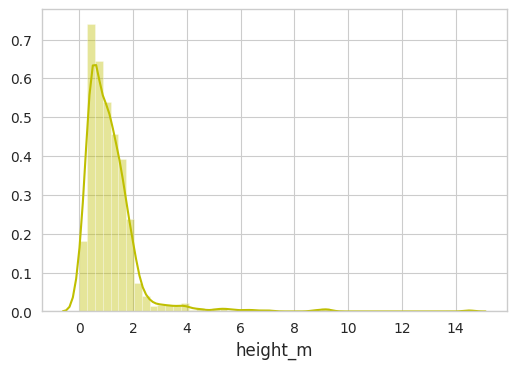

In [56]:
ax = sns.distplot(pokedata.height_m, color = 'y')

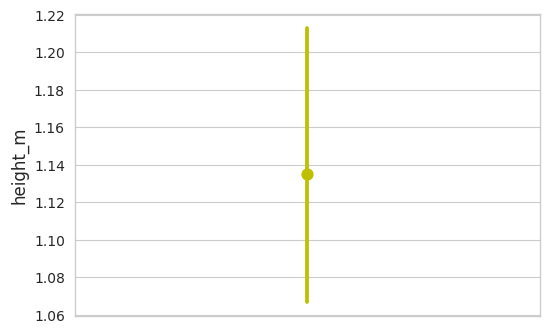

In [57]:
ax = sns.pointplot(pokedata.height_m, orient = 'v', color = 'y')

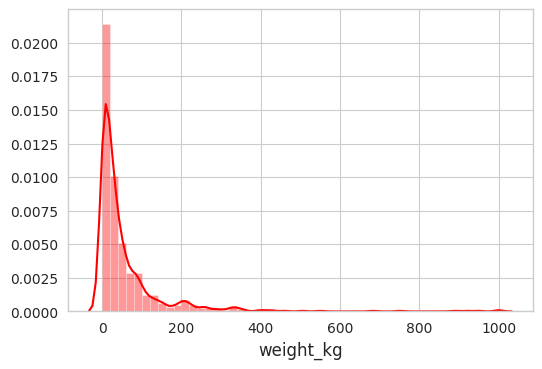

In [58]:
ax = sns.distplot(pokedata.weight_kg, color = 'r')

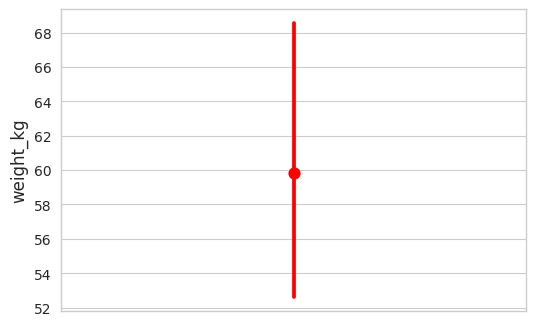

In [59]:
ax = sns.pointplot(pokedata.weight_kg, orient = 'v', color = 'r')

**Observations:**
1. **Average weight and height** are **~59 kg. and ~1.13 m** respectively.
2. **Most** Pokémon's **height** are between **0.1-4 m** and **weight** between **1-200 kg**.

**What we can do?**
1. It's a fair assumption that Pokémon that weigh more and having more height would most of the time provide sheer advantage if Pokémon were real, if not always, most of the times.

<a id='baseEggSteps'> 
### 8. base_egg_steps
</a>

Every Pokémon **hatches from an egg**. In a Pokémon game when one gets an egg the character has to **walk a certain number of steps** inorder for the player **to hatch the egg**.

**base_egg_steps** are the number of steps required to hatch the egg.

In [60]:
pokedata.base_egg_steps.nunique()

10

There are **10** unique **base_egg_steps**.

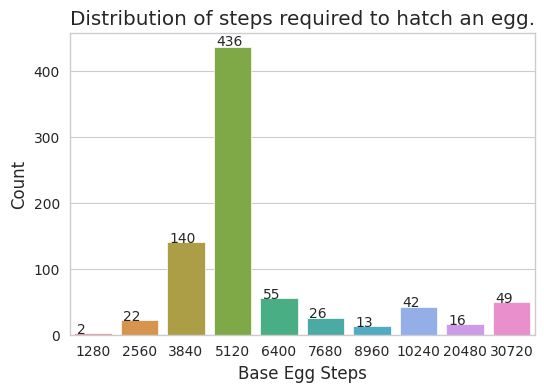

In [61]:
ax = sns.countplot(pokedata.base_egg_steps)
plt.xlabel('Base Egg Steps')
plt.ylabel('Count')
plt.title('Distribution of steps required to hatch an egg.')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

**Observation:**
1. There are **10 unique** numbers of **base_egg_steps**.
2. **Majority (436)** of the Pokémon require **5120 steps** to hatch their eggs.

**What we can do?**
1. We can see if **higher** the steps results in **stronger pokemon** being born.
2. We can also try to map the number of steps required to the time requred to walk that many steps in the Pokémon game and see if how much real world time investment would be required to get that pokemon.

<a id='experienceGrowth'> 
### 9. experience_growth
</a>

Every Pokémon **grows at a different rate**. Some Pokémon are easier to grow to their max potential and some are difficult. **experience_growth** shows how much experience a Pokémon requires to grow to it's max potential. **Lower the _experience_growth_ , faster the Pokémon will level up**.

In [62]:
pokedata.experience_growth.nunique()

6

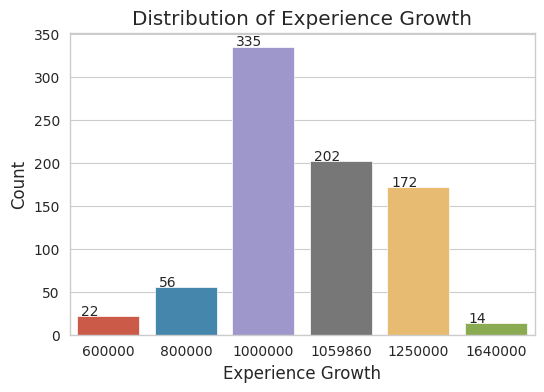

In [63]:
ax = sns.countplot(pokedata.experience_growth)
plt.xlabel('Experience Growth')
plt.ylabel('Count')
plt.title('Distribution of Experience Growth')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

**Observations:**
1. There are **6 uniques** levels of experience growth.
2. **600K** exerience_growth are the Pokémons that will **level up really fast** and the Pokémon will grow gradually slower as the experience_growth requirement increases.
3. Pokémon with experience_growth of **1.64M** will evolve the **slowest**.
4. Majority of the Pokémon require **1M - 1.25M** to get to **level 100**.

**What we can do?**
1. We can see what kind of Pokémon fall under which growth rate. Strong or Weak or if there is any correlation or not.
2. We can also try to figure out how we can grow Pokémon the fastest.

<a id='dataExplorationStats'> 
## Data Exploration - Pokémon Stats
</a>

We **ran our analysis** on the **miscellaneous attributes** of the Pokémon. Now we will explore the data over the more **static and key components in defining the Pokémon strength**.

**In this section we will see:**
1. [**Overview of all stats**](#overview)
2. [**base_happiness**](#baseHappiness)
3. [**hp**](#hp)
4. [**attack and defense**](#attackAndDefense)
5. [**sp_attack and sp_defense**](#spAttackAndSpDefense)
6. [**against_**](#against)
7. [**speed**](#speed)
8. [**generation**](#generation)
9. [**is_legendary**](#isLegendary)

<a id='overview'> 
### 1. Overview of all stats
</a>

We will plot all the stats related to a Pokémon to get an overview of how they **interact with each other**.

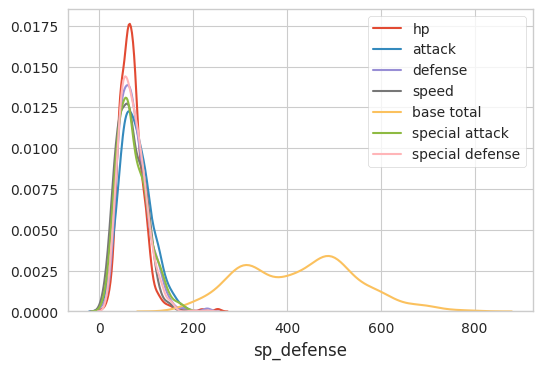

In [64]:
sns.distplot(pokedata.hp, hist = False, kde_kws={"label":"hp"})
sns.distplot(pokedata.attack, hist = False, kde_kws={"label":"attack"})
sns.distplot(pokedata.defense, hist = False, kde_kws={"label":"defense"})
sns.distplot(pokedata.speed, hist = False, kde_kws={"label":"speed"})
sns.distplot(pokedata.base_total, hist = False, kde_kws={"label":"base total"})
sns.distplot(pokedata.sp_attack, hist = False, kde_kws={"label":"special attack"})
sns.distplot(pokedata.sp_defense, hist = False, kde_kws={"label":"special defense"})

**Observation:**
1. We can see that **all the stats except for base total follow a similar trend**.

<a id='baseHappiness'> 
### 2. base_happiness
</a>

**base_happiness** is the value in which your Pokemon **starts with when you first obtain** it (catching it, trade, gift, hatching). Each Pokemon has its **own value**.

In [65]:
pokedata.base_happiness.nunique()

6

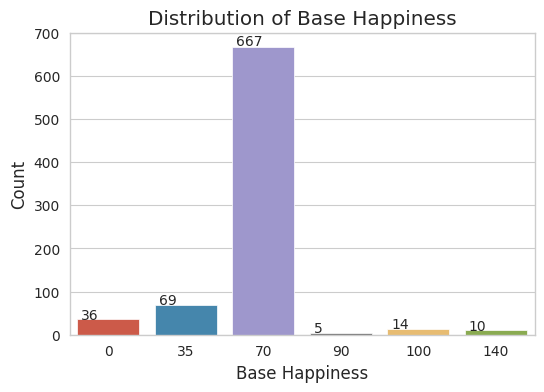

In [66]:
ax = sns.countplot(pokedata.base_happiness)
plt.xlabel('Base Happiness')
plt.ylabel('Count')
plt.title('Distribution of Base Happiness')

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

**Observations:**
1. There are **6 unique levels** of **base_happiness**,
2. Majority of them have the happiness of **70** to start with.
3. Very few are **extremely happy**.
4. Very few are **always grumpy**.

**What can be done?**
1. We can decide based on the level of **base_happiness** wether their **growth or strength** gets affected in any way **positive or negative**.

<a id='hp'> 
### 3. hp
</a>

Well, the short answer is that it stands for **Hit Points** — and here's what that means. Every Pokémon in the game **starts off with a certain number of HP, or Hit Points**, when they're captured. So HP is kind of like a measure of your Pokémon's **stamina and health**.

In [67]:
pokedata.hp.nunique()

99

Text(0.5, 0, 'HP')

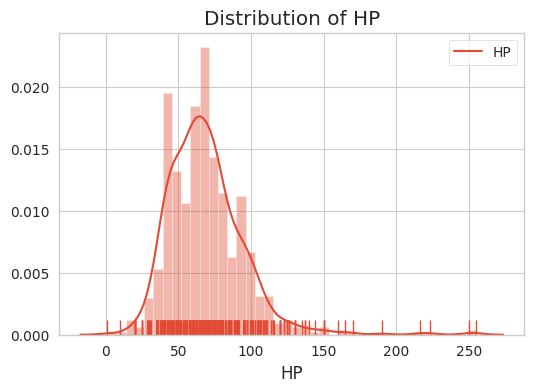

In [68]:
sns.distplot(pokedata.hp, hist = True, rug = True, kde_kws={"label": "HP"})
plt.title('Distribution of HP')
plt.xlabel('HP')

**Observation:**
1. Most Pokémon have the base **hp** in the range **25-150**.

**What can be done?**
1. We can see wether this affects their:
    1. Level of strength
    2. Depth of attack
    3. Resistance to other attacks
    
<a id='attackAndDefense'> 
### 4. attack and defense
</a>

**Physical Attacks** cause damage as a **function of the Attack** statistic of the attacking Pokémon and the **Defense** stat of the **defending Pokémon**

In [69]:
print('Attack:', pokedata.attack.nunique())
print('Defense:', pokedata.defense.nunique())

Attack: 114
Defense: 109


Text(0.5, 0, 'Value')

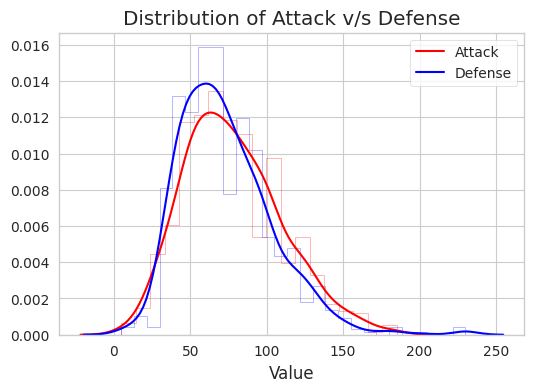

In [70]:
sns.distplot(pokedata.attack, 
             color="r", 
             hist_kws={
                 "histtype":"step",
                 "color":"r",
             },
             kde_kws={
                 "color":'r',
                 "label":"Attack"
             })

sns.distplot(pokedata.defense, 
             color="b", 
             hist_kws={
                 "histtype":"step",
                 "color":"b",
             },
             kde_kws={
                 "color":'b',
                 "label":"Defense"
             })

plt.title("Distribution of Attack v/s Defense")
plt.xlabel("Value")

**Observations:**
1. Most Pokémon have their attack and defense in the range of 25-175.
2. The end range of defense is more than that of attack.

<a id='spAttackAndSpDefense'> 
### 5. sp_attack and sp_defense
</a>

**What is the difference between attack and special attack in Pokemon?**

**Attack** means that you **physically hit** the opponent and **special attack** means that you don't touch the opponent **only the move does**. **Defense** is for **attacks that hit** you while **special defense** is for **attacks that hit you that aren't physical**.

In [71]:
print('Special Attack:', pokedata.sp_attack.nunique())
print('Special Defense:', pokedata.sp_defense.nunique())

Special Attack: 111
Special Defense: 97


Text(0.5, 0, 'Value')

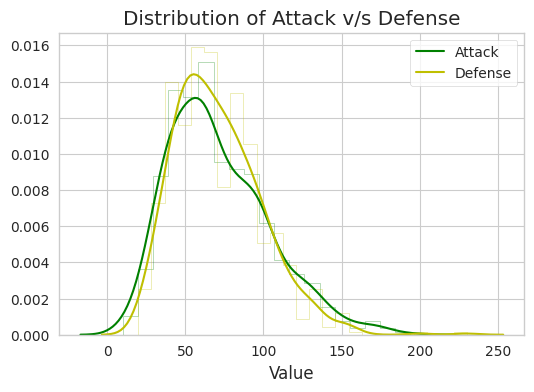

In [72]:
sns.distplot(pokedata.sp_attack, 
             color="g", 
             hist_kws={
                 "histtype":"step",
                 "color":"g",
             },
             kde_kws={
                 "color":'g',
                 "label":"Attack"
             })

sns.distplot(pokedata.sp_defense, 
             color="y", 
             hist_kws={
                 "histtype":"step",
                 "color":"y",
             },
             kde_kws={
                 "color":'y',
                 "label":"Defense"
             })

plt.title("Distribution of Attack v/s Defense")
plt.xlabel("Value")

**Observation:**
1. Most Pokémon have their **special attack** and **special defense** in the range of **25-175**.
2. The **end range** of **special defense** is **greater** than that of **special attack**.

**What can be done?**
1. **Correlation** between **attack and special attack** and same goes for **defense**
2. Relation to **hp**
3. Club relation with primary secondary type of Pokémon.

<a id='against'> 
### 6. against_
</a>

There are **18** features that denote the **amount of damage taken** against an attack of a particular type.

Let us get the list of columns having string **against_**

In [73]:
cols = pokedata.columns
against = list()
for col in cols:
    if 'against_' in str(col):
        against.append(col)
        
print(len(against))
print(against)

18
['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


We have **18** column names as required.

Let's see the **unique values** across these columns.

In [74]:
unique_elements = pd.unique(pokedata[against].values.ravel('K')).tolist()
unique_elements

[1.0, 0.5, 0.25, 2.0, 4.0, 0.0]

There are **6** unique values.

Lesser the value in the **against_** column, **stronger** is the Pokémon, and vice versa.

We can also see that it takes values only from the above mentioned values.

Now we can take the **average** of each of these columns and find the **maximum** to deterine **which attack majority of Pokémon are susceptible to**.

In [75]:
for col in against:
    if np.mean(pokedata[col]) > 1.2:
        print(col)

for col in against:
    if np.sum(pokedata[col]) > 1000:
        print(col)

against_ice
against_rock
against_rock


We see most Pokémon are **more susceptible to attacks** from **ice and rock** Pokémon.

Let's see the distribution of these values in each of the columns.

against_bug
[1.   0.5  0.25 2.   4.  ]


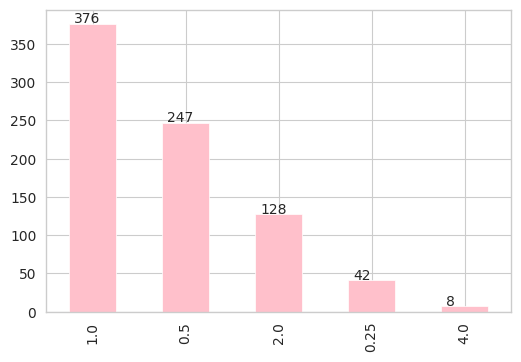

against_dark
[1.   0.5  2.   0.25 4.  ]


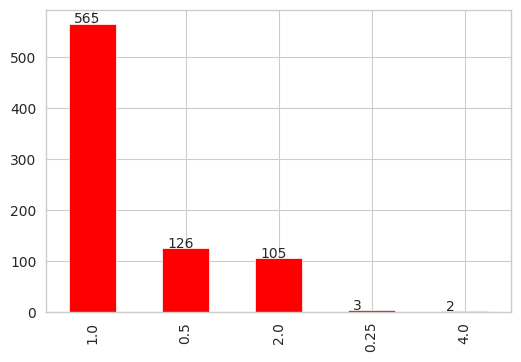

against_dragon
[1.  0.  0.5 2. ]


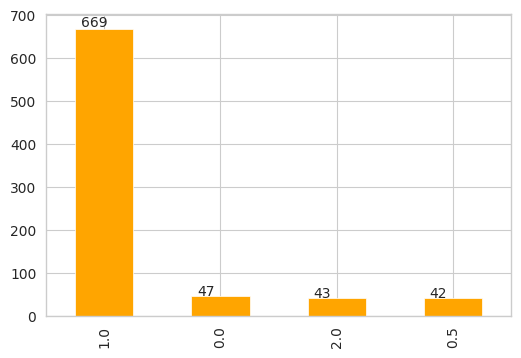

against_electric
[0.5  1.   2.   0.   4.   0.25]


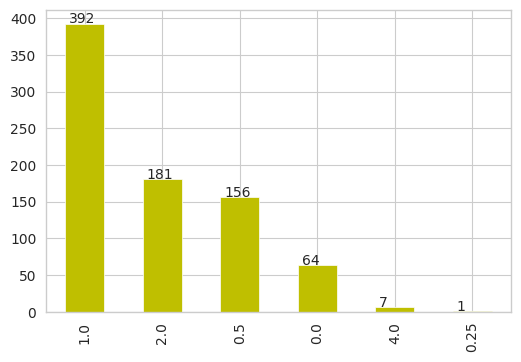

against_fairy
[0.5  1.   2.   0.25 4.  ]


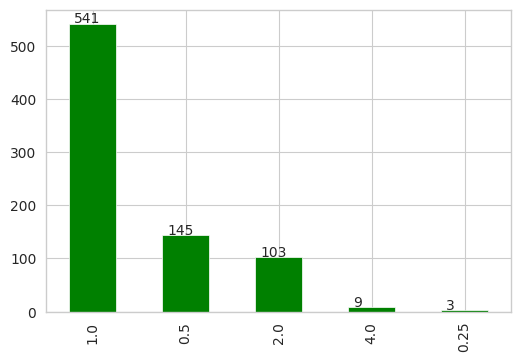

against_fight
[0.5  1.   0.25 2.   0.   4.  ]


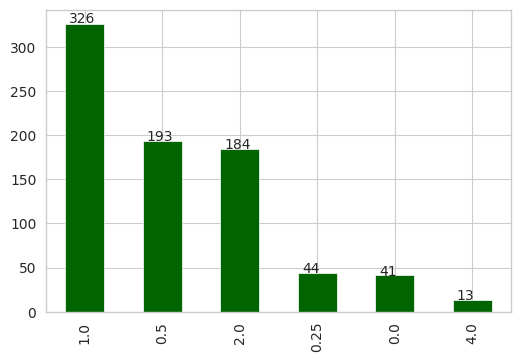

against_fire
[2.   0.5  1.   4.   0.25]


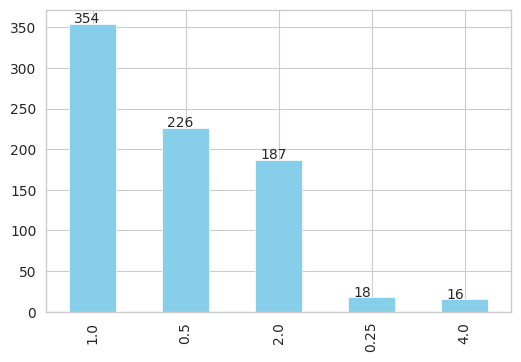

against_flying
[2.   1.   0.5  4.   0.25]


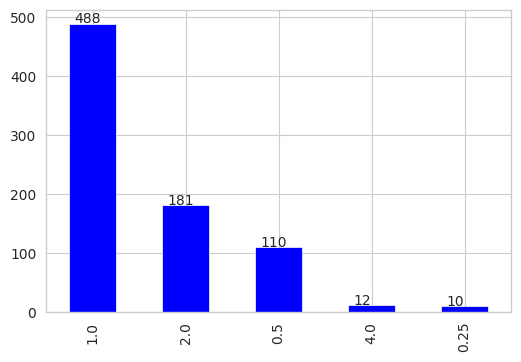

against_ghost
[1.  0.  2.  0.5 4. ]


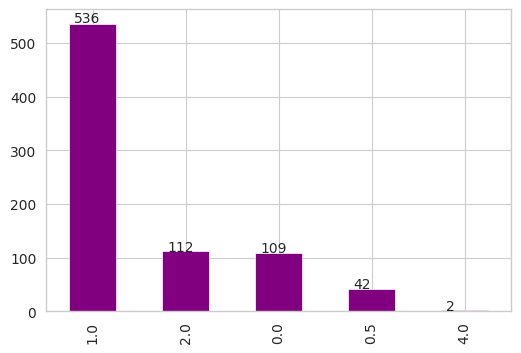

against_grass
[0.25 0.5  2.   1.   4.  ]


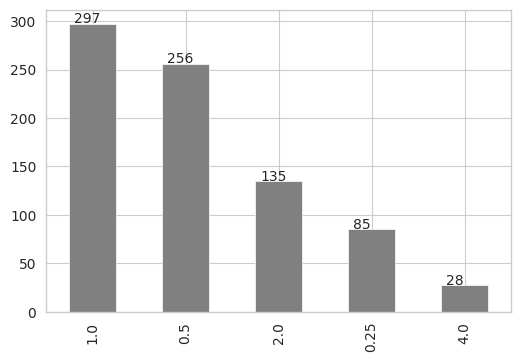

against_ground
[1.   2.   0.   0.5  0.25 4.  ]


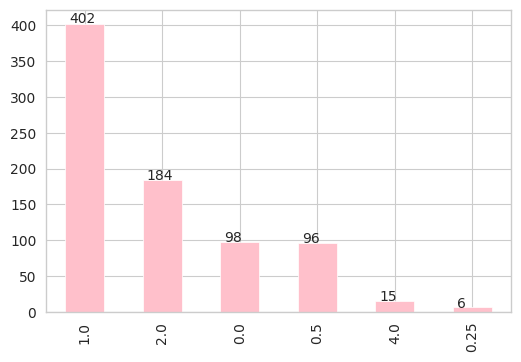

against_ice
[2.   0.5  1.   0.25 4.  ]


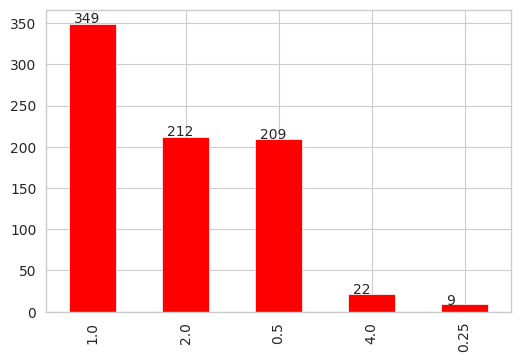

against_normal
[1.   0.5  0.   0.25]


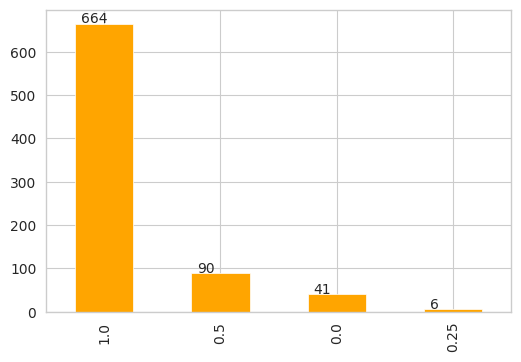

against_poison
[1.   0.5  0.25 2.   0.   4.  ]


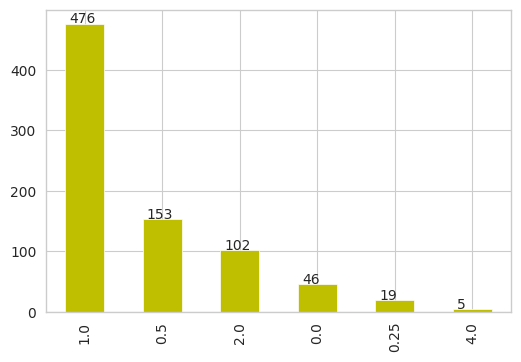

against_psychic
[2.   1.   0.5  0.   0.25 4.  ]


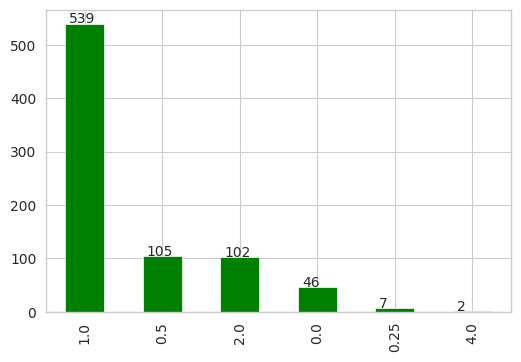

against_rock
[1.   2.   4.   0.5  0.25]


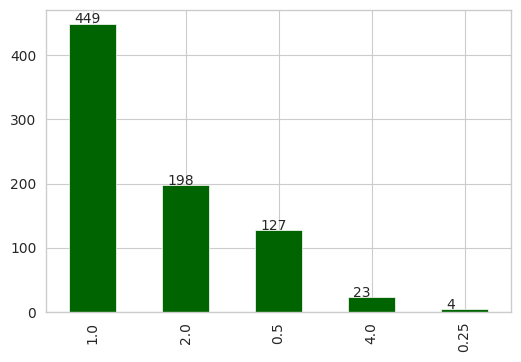

against_steel
[1.   0.5  2.   0.25 4.  ]


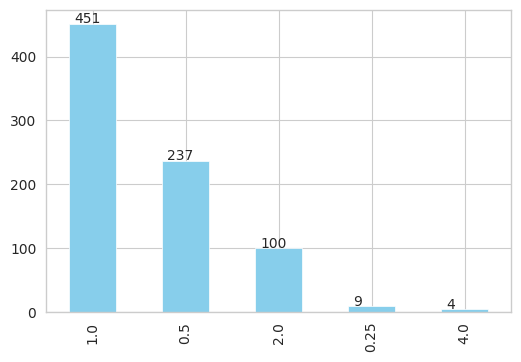

against_water
[0.5  2.   1.   4.   0.25]


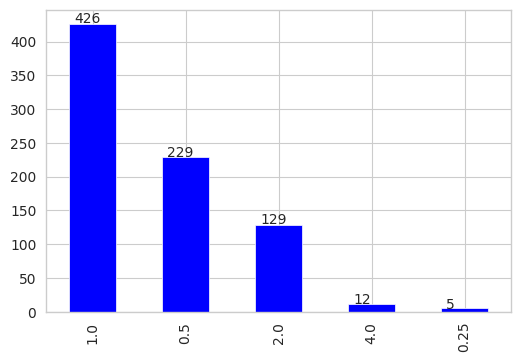

In [76]:
colors = ['pink', 'r', 'orange', 'y', 'g', 'darkgreen', 'skyblue', 'b', 'purple', 'gray']

for col in range(0, len(against)):
    print(against[col])
    print(pokedata[against[col]].unique())
    
    pp = pd.value_counts(pokedata[against[col]])
    
    ax = pp.plot.bar(color = colors[col % len(colors)])
    
    for each in ax.patches:
        ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))
    
    plt.show()

Now let's see which **primary** (type1) and **secondary** (type2) are **best and worst against** a certain type of Pokémon.

In [77]:
for col in against: 
    print('Strong', col)
    pt = pd.value_counts(pokedata[pokedata[col] < 1]['type1'])
    print(pt[:3])
    pt = pd.value_counts(pokedata[pokedata[col] < 1]['type2'])
    print(pt[:3], '\n')
    print('Weak', col)
    pt = pd.value_counts(pokedata[pokedata[col] >= 2]['type1'])
    print(pt[:3])
    pt = pd.value_counts(pokedata[pokedata[col] >= 2]['type2'])
    print(pt[:3], '\n\n')

Strong against_bug
fire      50
bug       37
normal    32
Name: type1, dtype: int64
flying      78
fighting    19
poison      18
Name: type2, dtype: int64 

Weak against_bug
grass      46
psychic    36
dark       17
Name: type1, dtype: int64
psychic    20
grass      14
dark       11
Name: type2, dtype: int64 


Strong against_dark
dark        26
fighting    26
fairy       18
Name: type1, dtype: int64
fighting    24
fairy       22
dark        16
Name: type2, dtype: int64 

Weak against_dark
psychic    46
ghost      25
steel       9
Name: type1, dtype: int64
psychic    25
ghost      13
flying      8
Name: type2, dtype: int64 


Strong against_dragon
steel    23
fairy    18
grass     8
Name: type1, dtype: int64
fairy      29
steel      22
psychic     6
Name: type2, dtype: int64 

Weak against_dragon
dragon    27
dark       4
flying     2
Name: type1, dtype: int64
dragon    16
flying     4
ground     4
Name: type2, dtype: int64 


Strong against_electric
grass       72
electric    36
groun

**Observation:**
1. Most Pokémon suffer from every attack of atleast **1.0**
2. There are some Pokemon that can withstand certain attacks
3. We have also figured which type is **strong and weak** against a certain type of Pokémon. For eg. Bug Pokemon are weak against Fire, flying and strong against grass, psychic.

**What can we do?**
1. We can ake into consideration the above observation to determine a combination of types that can sustain the maximum amount of Pokémon.

<a id='speed'> 
### 7. speed
</a>

The **speed stat** determines **the order** a Pokémon can **act in battle**. If Pokémon are moving with the different priority, Pokémon with **higher Speed** at the start of any turn will generally **make a move before ones with lower Speed**, in the case that two Pokémon have the **same Speed**, one of them will **randomly go first**.

In [78]:
print(pokedata.speed.nunique())

113


In [79]:
pokedata.speed.describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: speed, dtype: float64

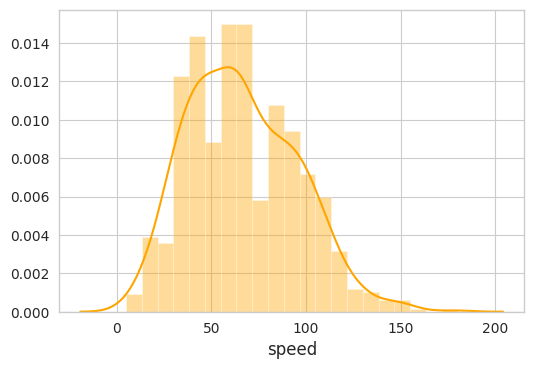

In [80]:
sns.distplot(pokedata.speed, color='orange')

Let's see which is **the fastest and the slowest** Pokémon.

In [81]:
print('Fastest Pokémon: {} {}'.format(pokedata.name[pokedata.speed.idxmax()], pokedata.speed[pokedata.speed.idxmax()]))
print('Slowest Pokémon: {} {}'.format(pokedata.name[pokedata.speed.idxmin()], pokedata.speed[pokedata.speed.idxmin()]))

Fastest Pokémon: Deoxys 180
Slowest Pokémon: Shuckle 5


**We came up with our own definition of speed:**

* Fast Pokémon < Mean + Standard Deviation
* Slow Pokémon > Mean - Standard Deviation
* Very Fast Pokémon > Mean + 2 * Standard Deviation
* Very Slow Pokémon < Mean + 2 * Standard Deviation

Let's see what we get:

[113, 132, 23, 3, 530]


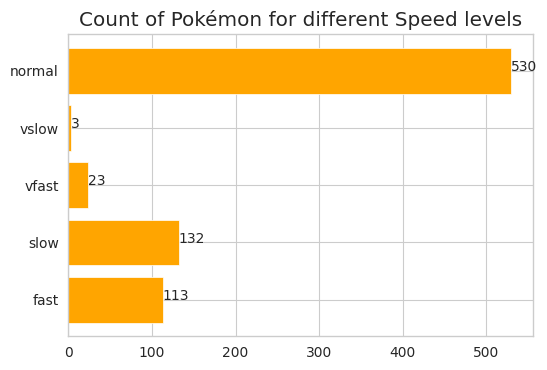

In [82]:
speed_statistics = pokedata.speed.describe()

mean = speed_statistics[1]
std_div = speed_statistics[2]

fast = pokedata[(pokedata.speed > mean + std_div) & (pokedata.speed < mean + 2 * std_div) ]['name']
slow = pokedata[(pokedata.speed < mean - std_div) & (pokedata.speed > mean - 2 * std_div)]['name']
vfast = pokedata[pokedata.speed > mean + 2 * std_div]['name']
vslow  = pokedata[pokedata.speed < mean - 2 * std_div]['name']
normal = pokedata[(pokedata.speed < mean + std_div) & (pokedata.speed > mean - std_div)]

speed_levels = ['fast', 'slow', 'vfast', 'vslow', 'normal']
speed_count = list(map(len, [fast, slow, vfast, vslow, normal]))
print(speed_count)

plt.barh(np.array(range(len(speed_count))), speed_count, color  = 'orange')
plt.yticks(np.array(range(len(speed_count))), speed_levels)
plt.title('Count of Pokémon for different Speed levels')

for index, value in enumerate(speed_count):
    plt.text(value, index, str(value))
    
plt.show()

**Observations:**
1. Over **500** Pokémon have speed **within the mean and single standard deviation** which is **normal** for our standards.
2. Almost **25** Pokémon are labeled **fast ot slow**.
3. **23** Pokémon are **very fast** against **3 very slow**.

**What can be done?**
1. We can relate speed to strength of attack and the type of Pokémon it is.
2. If we can get the data of battles by users we can also determine how often making the first move affects our odds of winning the battle.

<a id='generation'> 
### 8. generation
</a>

The number of generation in which the Pokémon was **first introduced**.

In [83]:
pokedata.generation.nunique()

7

There are **7** generations in total.

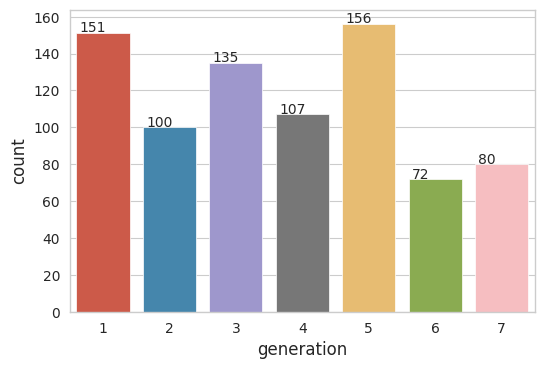

In [84]:
ax = sns.countplot(x = 'generation', data = pokedata)

for each in ax.patches:
    ax.annotate(str(int(each.get_height())), (each.get_x() + 0.05, each.get_height() * 1.005))

let's **visualise** it in terms of percentage.

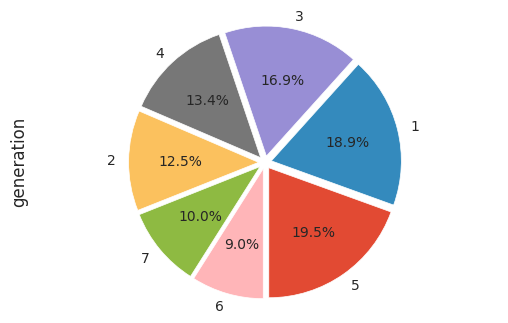

In [85]:
pp = pd.value_counts(pokedata.generation)
pp.plot.pie(startangle = 270, autopct = '%1.1f%%', shadow = False, explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal')
plt.show()

**Observation:**
1. A bulk of Pokémon are from the **1st** and the **5th** generation, **18.9%** and **19.5%** respectively.

**What can be done?**
1. We will see if later generation Pokémon have more strength or strong Pokémon are distributed throuhout the 7 generations.

<a id='isLegendary'> 
### 9. is_legendary
</a>

Denotes wether the Pokémon is **legendary or not**.

Text(0, 0.5, 'Count')

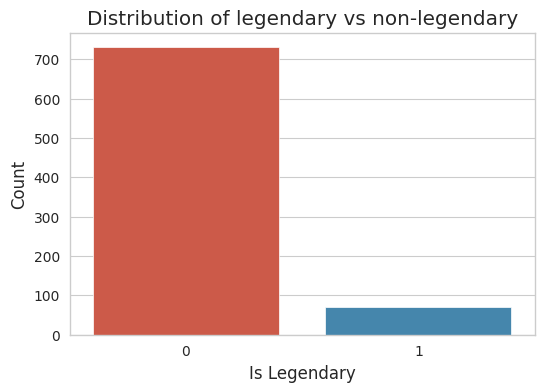

In [86]:
ax = sns.countplot(x = pokedata.is_legendary, data = pokedata)
plt.title('Distribution of legendary vs non-legendary')
plt.xlabel('Is Legendary')
plt.ylabel('Count')

**Observation:**

* Less than **100** Pokémon are legendary.

**What can be done?**

* See wether legendary Pokémon have exceptional statistics.
* What makes them so special to attain status of legend

<span style='color:red'>**To be continued...**</span>